In [1]:
import numpy as np
import pandas as pd
import vaex
import dask
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:

n_rows = 10000000
n_cols = 80
mu, sigma = 7, 3 
df = pd.DataFrame(np.random.normal(mu, sigma, size=(n_rows, n_cols)), columns=[f'c{i}' for i in range(n_cols)])
### save around 6gb data 
df.to_csv('../data/dataset.csv')

### I/O

The only requirement on the Vaex data frame, it works well with HDF5 data. So the CSV files need to convert to the required HDF5 format.Converts into intermediate hdf5 files based on chunk size argument
Also aggregates the chunks and saves into one hdf5 

In [ ]:
%time vaex_df = vaex.from_csv('../data/dataset.csv', convert=True, chunk_size=1000000)

In [6]:
%%time
pd_df = pd.read_csv('../data/dataset.csv')

CPU times: user 1min 55s, sys: 22.2 s, total: 2min 18s
Wall time: 2min 26s


read directly from hdf5 file would take ms as sorted in column format

In [2]:
%%time
vaex_df = vaex.open('../data/dataset.csv.hdf5')

CPU times: user 707 ms, sys: 223 ms, total: 931 ms
Wall time: 1.19 s


In [3]:
print(vaex_df.shape)
vaex_df.head()

(10000000, 81)


#,Unnamed: 0,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79
0,0,4.6979,8.77072,6.56435,9.84158,5.75058,7.95298,5.02752,4.49698,10.8781,8.97752,5.05758,9.67977,7.72749,10.7072,7.67609,8.763,6.67839,3.62642,7.3007,8.19756,7.96745,7.38679,6.61808,10.0571,7.09957,6.06199,3.46468,6.54203,5.6668,5.93491,4.79201,7.40095,9.9509,8.96652,12.1515,14.389,12.0348,6.70016,13.3804,7.49172,2.73006,6.26755,8.62473,3.78213,2.49237,4.27662,4.30448,8.83142,7.58712,8.18626,4.43875,5.83439,6.07822,9.8592,11.7502,4.5749,2.75096,4.66408,2.91013,7.02943,12.907,3.11924,1.68638,4.28463,7.30062,11.7568,9.07602,10.7124,7.1692,1.95161,7.24987,6.36384,3.36408,12.6506,7.68318,8.19804,6.88962,2.53267,5.06029,12.2429
1,1,6.59908,2.37651,5.71334,4.81135,9.58743,8.86807,1.47635,4.50266,2.90834,11.6442,9.78297,2.71649,7.21038,7.40628,9.41528,5.17727,4.36291,11.5406,3.21977,0.50321,7.67584,5.40067,7.67552,5.38171,8.69603,6.35798,9.55726,8.86774,5.83114,5.34197,5.71952,8.60017,9.96113,11.0159,8.27675,5.63915,8.99588,10.687,8.09686,6.32467,4.14395,6.89682,4.54613,8.53488,6.32891,6.34476,9.96376,6.71482,5.79853,1.25161,0.620119,9.74425,15.211,7.42856,4.28416,5.81505,6.77672,8.115,10.5529,7.63797,15.3242,2.78256,8.70845,10.0202,4.47588,10.137,9.28744,5.18855,6.86822,3.48239,5.504,7.40915,3.87418,7.90286,5.80181,5.77177,10.0148,6.56707,8.27713,2.34872
2,2,10.1961,7.32316,1.9871,11.0663,9.07852,4.16169,13.2721,7.56355,3.98862,4.42454,7.4881,8.82834,7.84651,-1.92758,6.78529,5.15984,9.35615,4.11863,4.04481,5.90667,5.81679,2.2633,7.6747,3.10445,9.05687,9.63813,9.62977,8.11333,12.3485,10.2738,7.92208,3.89361,5.44442,4.14426,8.55366,1.20554,4.49974,7.20229,8.68831,11.3177,2.62549,4.66199,8.28913,7.12091,4.72193,7.44265,2.86368,0.960148,3.18755,4.5794,6.07098,4.82261,1.90866,9.51391,6.88073,10.5459,3.40952,7.90442,9.97605,5.18844,7.23349,7.97986,5.94342,7.53628,6.08355,9.51557,10.9415,5.49845,6.52266,7.47466,4.55132,1.2194,9.75902,2.24926,5.61778,7.79943,5.00792,5.97845,3.80953,4.75559
3,3,6.35845,5.41787,6.94079,6.60477,8.80072,7.76006,7.57089,3.47122,3.72357,8.99716,10.4039,2.03294,4.72604,6.54639,3.55604,10.599,11.4485,7.29499,4.61114,6.17021,7.15232,6.48894,7.8321,10.8636,9.86036,11.3297,2.61766,1.60379,8.43692,9.45872,13.1422,4.80882,7.83663,10.3719,8.37798,10.562,10.3392,8.07049,5.17745,5.76161,4.99661,9.00598,10.3724,3.71429,10.4212,8.42647,6.95373,6.76215,6.58227,5.95062,10.2335,8.46984,5.38599,6.53009,3.72141,10.3501,7.64833,5.94563,4.4206,-1.46625,5.01044,8.05099,3.66482,12.3659,9.43516,7.85996,4.45623,7.05836,2.7008,10.5023,6.1365,6.6868,8.70043,4.06655,6.99143,11.192,5.30777,8.19363,7.18778,6.79075
4,4,9.96498,3.08717,4.06472,7.94133,5.40701,3.89747,7.79406,3.23897,6.11911,8.68363,8.79612,3.82103,10.4588,12.1271,7.23105,4.35043,5.1808,13.325,11.2482,9.67233,6.85453,8.0465,8.55814,3.30766,3.96267,9.38194,6.76997,8.10372,4.49723,3.33557,8.36631,7.51405,0.013873,2.12721,3.66972,11.265,11.3683,4.76299,3.56155,7.26436,5.48471,6.5198,11.8722,7.32721,3.57977,7.46572,9.78181,9.28941,4.75379,9.60692,3.41846,5.4941,10.5678,6.68442,10.661,2.18922,6.79655,7.12157,8.1398,5.76057,8.75465,11.4573,10.1221,4.41987,4.3306,9.85827,5.83447,7.02891,3.6822,9.88166,4.777,6.7582,3.72462,7.57259,6.00003,9.96147,4.27892,4.94618,10.2624,7.64168
5,5,3.07691,0.358927,9.28529,3.58946,10.9233,14.2967,9.61904,9.59514,8.77175,2.44921,12.271,3.68731,4.5652,7.18352,5.60738,12.006,8.38339,6.23743,5.90837,10.1337,1.46746,4.82788,11.6869,6.9325,3.01256,7.06918,10.1088,6.1089,7.32092,5.27986,8.55854,10.4034,9.54231,10.7907,5.02665,9.34786,5.91981,3.37339,9.79003,6.96417,8.5407,9.54953,2.16053,3.68859,9.73767,9.41812,1.62137,3.3498,7.7373,6.09148,7.17729,7.67269,8.75949,8.53285,7.6558,6.36176,8.09794,6.59429,-0.82551,2.79287,5.4893,12.5616,4.330

In [4]:
%%time

vaex_df.mean(vaex_df.c1), vaex_df.count()
counts_x = vaex_df.count(binby=vaex_df.c5, limits=[0, 10], shape=64)
counts_x

CPU times: user 318 ms, sys: 117 ms, total: 435 ms
Wall time: 104 ms


array([ 14444,  16293,  18128,  20569,  23087,  25892,  28132,  31698,
        34899,  38218,  42119,  45969,  50892,  55274,  59591,  65135,
        70562,  75464,  81426,  87345,  93139,  99572, 105744, 112235,
       118741, 125613, 132516, 138117, 145292, 150689, 157786, 163287,
       169613, 175065, 180046, 184626, 188727, 193412, 197085, 199529,
       202657, 204469, 206756, 207066, 207237, 207531, 206214, 206314,
       203668, 202019, 199043, 195607, 192037, 187308, 181870, 177877,
       172976, 167149, 161621, 154175, 148325, 142799, 135295, 128716])

### Virtual columns

In [7]:
# evaluated lazily as result of expression lives within df it was defined in
%time vaex_df['r'] = (vaex_df['c1']**2 + vaex_df['c2']**2)**0.5
# pandas 
%time pd_df['r'] = (pd_df['c1']**2 + pd_df['c2']**2)**0.5

CPU times: user 2.83 ms, sys: 5.55 ms, total: 8.38 ms
Wall time: 7.38 ms
CPU times: user 575 ms, sys: 901 ms, total: 1.48 s
Wall time: 342 ms


In [61]:
%%time
vaex_df.r

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.7 µs


Expression = r
Length: 10,000,000 dtype: float64 (column)
------------------------------------------
      0  10.9552
      1  6.18789
      2  7.58797
      3  8.80499
      4  5.10417
      ...       
9999995  12.4254
9999996  9.39503
9999997  12.6433
9999998  11.8978
9999999   16.339

In [9]:
# calculated eagerly as operation will live "outside" of the DataFrame from which it was defined

%time mean_r = vaex_df.r.mean()
%time mean_r = pd_df['r'].mean()

CPU times: user 260 ms, sys: 184 ms, total: 444 ms
Wall time: 212 ms
CPU times: user 18.6 ms, sys: 3.41 ms, total: 22 ms
Wall time: 21.7 ms


### Plotting

CPU times: user 654 ms, sys: 240 ms, total: 893 ms
Wall time: 716 ms


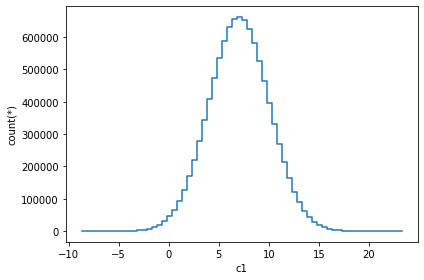

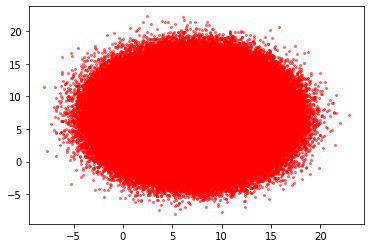

In [10]:
%%time

plt.figure()
vaex_df.viz.histogram(vaex_df.c1, progress='widget');

plt.figure()

x = vaex_df.evaluate("c5", selection=vaex_df.c10 < 7)
y = vaex_df.evaluate("c7", selection=vaex_df.c10 < 7)
plt.scatter(x, y, c="red", alpha=0.5, s=4);

### Vaex df from numpy array and Joins

In [62]:
%time
a = pd_df.iloc[0:100, 1].values
b = pd_df.iloc[0:100, 2].values
df1 = vaex.from_arrays(a=a, b=b)
df1

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs


#,a,b
0,4.697903634833819,8.770723182672354
1,6.599075841946298,2.376512798120376
2,10.19610172651946,7.3231601727152755
3,6.358447075878876,5.417873214262979
4,9.964984043272402,3.087173395324161
...,...,...
95,10.687075017318874,5.899908897491862
96,0.0853225948795222,4.150184254902616
97,15.190442894510925,3.0265394639245464
98,6.407923787205217,5.285320459990462


In [63]:
%%time
c = pd_df.iloc[0:100, 3].values
d = a**2
df2 = vaex.from_arrays(b=b, c=c, d=d)
df2

CPU times: user 1.1 ms, sys: 222 µs, total: 1.32 ms
Wall time: 1.22 ms


#,b,c,d
0,8.770723182672354,6.56434917140596,22.070298562184803
1,2.376512798120376,5.713337077204002,43.547801967759234
2,7.3231601727152755,1.9870961686307265,103.96049041753312
3,5.417873214262979,6.940789263112561,40.42984921675262
4,3.087173395324161,4.064719000556583,99.30090698267358
...,...,...,...
95,5.899908897491862,6.4528463171451165,114.2135724258012
96,4.150184254902616,13.077720206168298,0.007279945196975069
97,3.0265394639245464,3.378496577159145,230.74955533139746
98,5.285320459990462,7.634394718112023,41.06148726263045


In [43]:
%%time

df1.join(df2, left_on='b', right_on='b', how='inner')

CPU times: user 7.28 ms, sys: 3.58 ms, total: 10.9 ms
Wall time: 8.68 ms


#,a,b,c,d
0,4.697903634833819,8.770723182672354,6.56434917140596,22.070298562184803
1,6.599075841946298,2.376512798120376,5.713337077204002,43.547801967759234
2,10.19610172651946,7.3231601727152755,1.9870961686307265,103.96049041753312
3,6.358447075878876,5.417873214262979,6.940789263112561,40.42984921675262
4,9.964984043272402,3.087173395324161,4.064719000556583,99.30090698267358
...,...,...,...,...
95,10.687075017318874,5.899908897491862,6.4528463171451165,114.2135724258012
96,0.0853225948795222,4.150184254902616,13.077720206168298,0.007279945196975069
97,15.190442894510925,3.0265394639245464,3.378496577159145,230.74955533139746
98,6.407923787205217,5.285320459990462,7.634394718112023,41.06148726263045


### can also stack multiple array in single expression columnn

In [54]:
a = pd_df.iloc[0:100, 40:80].values
df1 = vaex.from_arrays(a=a)
df1.a

Expression = a
Length: 100 dtype: float64 (column)
-----------------------------------
 0  'array([ 7.49171789,  2.73005933,  6.26755135,  ...
 1  'array([ 6.32466747,  4.14394951,  6.89682365,  ...
 2  'array([11.31766846,  2.62548598,  4.66198726,  ...
 3  'array([ 5.76161359,  4.99660724,  9.00597814, 1...
 4  'array([ 7.26436154,  5.48470581,  6.51979827, 1...
                          ...                          
95  'array([9.75299527, 5.10006965, 4.43652762, 7.56...
96  'array([ 6.89465151,  6.57352273,  6.95547967,  ...
97  'array([ 5.06106956,  3.26028477,  6.01422318, 1...
98  'array([11.49483579,  9.49043332,  7.57578348,  ...
99  'array([ 7.84089786,  7.58273643,  6.76180734, 1...

In [58]:
df1.a.values[0]

array([ 7.49171789,  2.73005933,  6.26755135,  8.6247272 ,  3.78213376,
        2.49236826,  4.2766211 ,  4.3044821 ,  8.83141713,  7.58711851,
        8.18626243,  4.43875094,  5.83439432,  6.07822489,  9.85920333,
       11.75019223,  4.5749027 ,  2.7509577 ,  4.66408069,  2.91012957,
        7.02942719, 12.90703821,  3.11924208,  1.68638067,  4.28463337,
        7.30061918, 11.75684228,  9.07601763, 10.71243326,  7.16919674,
        1.95160942,  7.24986515,  6.36383867,  3.36407904, 12.65064451,
        7.683175  ,  8.19804131,  6.88961548,  2.53266765,  5.06029333])